# AIM

`Checking whether the given person would survive or not`

In [1]:
# Importing the necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

### Reading the data

In [2]:
df_train = pd.read_csv("train.csv")
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_train.shape

(891, 12)

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Significance of each column name

survival	Survival	      0 = No, 1 = Yes

pclass	    Ticket class	  1 = 1st, 2 = 2nd, 3 = 3rd
sex	        Sex	
Age	        Age in years	
sibsp	    # of siblings / spouses aboard the Titanic	
parch	    # of parents / children aboard the Titanic	
ticket   	Ticket number	
fare	    Passenger fare	
cabin	    Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

### Cleaning data

In [5]:
df_train = df_train.drop('Name',axis=1)
df_train = df_train.drop('Ticket',axis=1,)
df_train = df_train.drop('Cabin',axis=1,)
df_train = df_train.drop('Fare',axis=1,)

In [6]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Embarked        object
dtype: object

In [7]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,male,22.0,1,0,S
1,2,1,1,female,38.0,1,0,C
2,3,1,3,female,26.0,0,0,S
3,4,1,1,female,35.0,1,0,S
4,5,0,3,male,35.0,0,0,S


In [8]:
df_train['Family'] = df_train['SibSp'] + df_train['Parch'] + 1 

In [9]:
df_train = df_train.drop('SibSp',axis = 1)
df_train = df_train.drop('Parch',axis = 1)

In [10]:
df_train.shape

(891, 7)

In [11]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,Embarked,Family
0,1,0,3,male,22.0,S,2
1,2,1,1,female,38.0,C,2
2,3,1,3,female,26.0,S,1
3,4,1,1,female,35.0,S,2
4,5,0,3,male,35.0,S,1


In [12]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
Embarked         2
Family           0
dtype: int64



### Filling the embarked values with mode (having the highest frequency)


In [13]:
df_train['Embarked'].mode()

0    S
dtype: object

In [14]:
df_train['Embarked'] = df_train['Embarked'].fillna('S')

In [15]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
Embarked         0
Family           0
dtype: int64

In [16]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,Embarked,Family
0,1,0,3,male,22.0,S,2
1,2,1,1,female,38.0,C,2
2,3,1,3,female,26.0,S,1
3,4,1,1,female,35.0,S,2
4,5,0,3,male,35.0,S,1


## Filling the missing age values with median by groups and define Age group

In [17]:
df_train['Age'] = df_train.groupby(['Sex', 'Pclass'])['Age']\
    .transform(lambda x: x.fillna(x.median()))

In [18]:
df_train['Age-group'] = 0
df_train['Age-group'][df_train['Age'] >= 12] = 1 
df_train['Age-group'][df_train['Age'] >= 26] = 2 
df_train['Age-group'][df_train['Age'] >= 40] = 3 
df_train['Age-group'][df_train['Age'] >= 60] = 4 
df_train['Age-group'][df_train['Age'] >= 75] = 5 

In [19]:
df_train = df_train.drop('Age',axis=1)

In [20]:
df_train.head(20)

,PassengerId,Survived,Pclass,Sex,Embarked,Family,Age-group
0,1,0,3,male,S,2,1
1,2,1,1,female,C,2,2
2,3,1,3,female,S,1,2
3,4,1,1,female,S,2,2
4,5,0,3,male,S,1,2
5,6,0,3,male,Q,1,1
6,7,0,1,male,S,1,3
7,8,0,3,male,S,5,0
8,9,1,3,female,S,3,2
9,10,1,2,female,C,2,1


In [21]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  891 non-null    int64 
 1   Survived     891 non-null    int64 
 2   Pclass       891 non-null    int64 
 3   Sex          891 non-null    object
 4   Embarked     891 non-null    object
 5   Family       891 non-null    int64 
 6   Age-group    891 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 48.9+ KB


# Finding relationships b/w survival and other features (Exploratory Analysis)

In [22]:
def plot_analysis (param1, param2):
    df_slice = df_train[[param1, param2,'PassengerId']]
    slice_pivot = df_slice.pivot_table(index=[param1], columns=[param2], aggfunc=np.size,
                                       fill_value=0)
    p_chart = slice_pivot.plot.bar()
    return slice_pivot
    return p_chart


PassengerId     
Sex           female male
Survived                 
0                 81  468
1                233  109

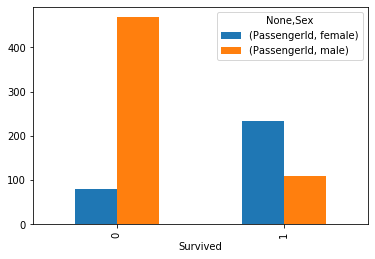

In [23]:
plot_analysis('Survived','Sex')

PassengerId         
Embarked           C   Q    S
Survived                     
0                 75  47  427
1                 93  30  219

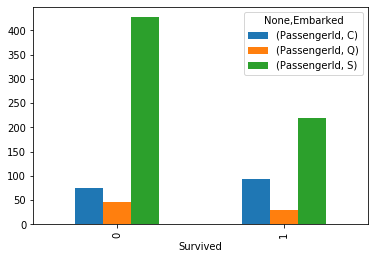

In [24]:
plot_analysis('Survived','Embarked')

PassengerId         
Pclass             1   2    3
Survived                     
0                 80  97  372
1                136  87  119

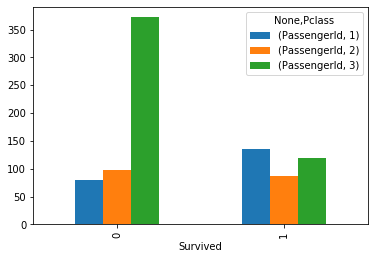

In [25]:
plot_analysis("Survived","Pclass")

PassengerId                             
Family            1   2   3   4   5   6  7  8  11
Survived                                         
0                374  72  43   8  12  19  8  6  7
1                163  89  59  21   3   3  4  0  0

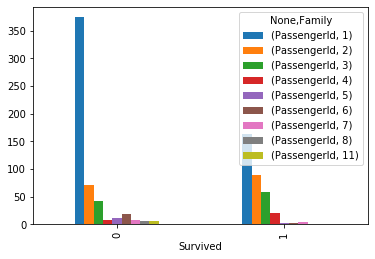

In [26]:
plot_analysis("Survived","Family")

PassengerId                     
Age-group           0    1    2   3   4  5
Survived                                  
0                  29  250  152  99  19  0
1                  39  119  118  59   6  1

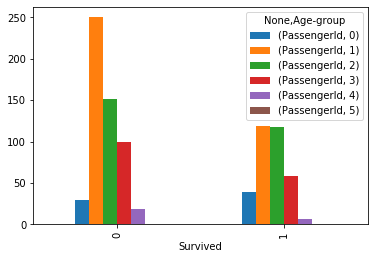

In [27]:
plot_analysis("Survived", "Age-group")

##converting string type to integers


In [28]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Embarked,Family,Age-group
0,1,0,3,male,S,2,1
1,2,1,1,female,C,2,2
2,3,1,3,female,S,1,2
3,4,1,1,female,S,2,2
4,5,0,3,male,S,1,2


In [29]:
df_train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [30]:
df_train['Embarked'][df_train['Embarked'] == 'S'] = 1
df_train['Embarked'][df_train['Embarked'] == 'C'] = 2
df_train['Embarked'][df_train['Embarked'] == 'Q'] = 3
df_train.head()

,PassengerId,Survived,Pclass,Sex,Embarked,Family,Age-group
0,1,0,3,male,1,2,1
1,2,1,1,female,2,2,2
2,3,1,3,female,1,1,2
3,4,1,1,female,1,2,2
4,5,0,3,male,1,1,2


In [31]:
df_train['Sex'][df_train['Sex'] == 'male'] = 1
df_train['Sex'][df_train['Sex'] == 'female'] = 2

In [32]:
df_train.head(20)

,PassengerId,Survived,Pclass,Sex,Embarked,Family,Age-group
0,1,0,3,1,1,2,1
1,2,1,1,2,2,2,2
2,3,1,3,2,1,1,2
3,4,1,1,2,1,2,2
4,5,0,3,1,1,1,2
5,6,0,3,1,3,1,1
6,7,0,1,1,1,1,3
7,8,0,3,1,1,5,0
8,9,1,3,2,1,3,2
9,10,1,2,2,2,2,1


In [33]:
X = df_train.drop('Survived',axis=1)


In [34]:
X.head()

,PassengerId,Pclass,Sex,Embarked,Family,Age-group
0,1,3,1,1,2,1
1,2,1,2,2,2,2
2,3,3,2,1,1,2
3,4,1,2,1,2,2
4,5,3,1,1,1,2


In [35]:
X = X.drop('PassengerId', axis =1)

In [36]:
X.head()

,Pclass,Sex,Embarked,Family,Age-group
0,3,1,1,2,1
1,1,2,2,2,2
2,3,2,1,1,2
3,1,2,1,2,2
4,3,1,1,1,2


In [37]:
Y = df_train["Survived"]

In [38]:
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

# Train and fit the model 

In [39]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.33,random_state = np.random)

In [40]:
X_train.shape

(596, 5)

In [41]:
Y_train.shape

(596,)

In [42]:
X_test.shape

(295, 5)

In [43]:
Y_test.shape

(295,)

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors

In [45]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train,Y_train)
y_pred = knn.predict(X_test)
y_pred.shape

(295,)

In [46]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(Y_test, y_pred, normalize=True) * float(100)
acc   

78.64406779661017

### We now iterate through different values of k and check the accuracy, and further plot the error rate vs k plots

In [47]:
error_rate = [] #create empty list to store data
test = []
train = []
neighbors = np.arange(1,100) #1-100
for neighbor in neighbors: #iterate through numbers
    print ('k = ',neighbor)
    knn = KNeighborsClassifier(n_neighbors = neighbor) #create classifier
    knn.fit(X_train,Y_train)#fit the model 
    pred = knn.predict(X_test) #make prediction
    train_accuracy=knn.score(X_train,Y_train) #print accuracy
    test_accuracy=knn.score(X_test,Y_test)
    train.append(train_accuracy) #add to the list for storage
    test.append(test_accuracy)
    print('Train Acc',train_accuracy)
    print('Test Acc',test_accuracy)
    
    accuracy = accuracy_score(Y_test,pred,normalize=True) * float(100)
    

    print('CV accuracy for k = %d is %d%%' % (neighbor, accuracy))
    error_rate.append(np.mean(pred != Y_test))
    
    

    

k =  1
Train Acc 0.8036912751677853
Test Acc 0.7220338983050848
CV accuracy for k = 1 is 72%
k =  2
Train Acc 0.8288590604026845
Test Acc 0.7762711864406779
CV accuracy for k = 2 is 77%
k =  3
Train Acc 0.825503355704698
Test Acc 0.7932203389830509
CV accuracy for k = 3 is 79%
k =  4
Train Acc 0.8355704697986577
Test Acc 0.8101694915254237
CV accuracy for k = 4 is 81%
k =  5
Train Acc 0.8355704697986577
Test Acc 0.7864406779661017
CV accuracy for k = 5 is 78%
k =  6
Train Acc 0.8355704697986577
Test Acc 0.7898305084745763
CV accuracy for k = 6 is 78%
k =  7
Train Acc 0.8305369127516778
Test Acc 0.7966101694915254
CV accuracy for k = 7 is 79%
k =  8
Train Acc 0.8305369127516778
Test Acc 0.7864406779661017
CV accuracy for k = 8 is 78%
k =  9
Train Acc 0.8271812080536913
Test Acc 0.8
CV accuracy for k = 9 is 80%
k =  10
Train Acc 0.825503355704698
Test Acc 0.7898305084745763
CV accuracy for k = 10 is 78%
k =  11
Train Acc 0.8104026845637584
Test Acc 0.7898305084745763
CV accuracy for k = 

Train Acc 0.7651006711409396
Test Acc 0.7593220338983051
CV accuracy for k = 89 is 75%
k =  90
Train Acc 0.7634228187919463
Test Acc 0.7661016949152543
CV accuracy for k = 90 is 76%
k =  91
Train Acc 0.7634228187919463
Test Acc 0.7661016949152543
CV accuracy for k = 91 is 76%
k =  92
Train Acc 0.7651006711409396
Test Acc 0.7661016949152543
CV accuracy for k = 92 is 76%
k =  93
Train Acc 0.761744966442953
Test Acc 0.7694915254237288
CV accuracy for k = 93 is 76%
k =  94
Train Acc 0.761744966442953
Test Acc 0.7627118644067796
CV accuracy for k = 94 is 76%
k =  95
Train Acc 0.761744966442953
Test Acc 0.7661016949152543
CV accuracy for k = 95 is 76%
k =  96
Train Acc 0.7634228187919463
Test Acc 0.7694915254237288
CV accuracy for k = 96 is 76%
k =  97
Train Acc 0.761744966442953
Test Acc 0.7661016949152543
CV accuracy for k = 97 is 76%
k =  98
Train Acc 0.761744966442953
Test Acc 0.7661016949152543
CV accuracy for k = 98 is 76%
k =  99
Train Acc 0.7718120805369127
Test Acc 0.769491525423728

Text(0, 0.5, 'Error Rate')

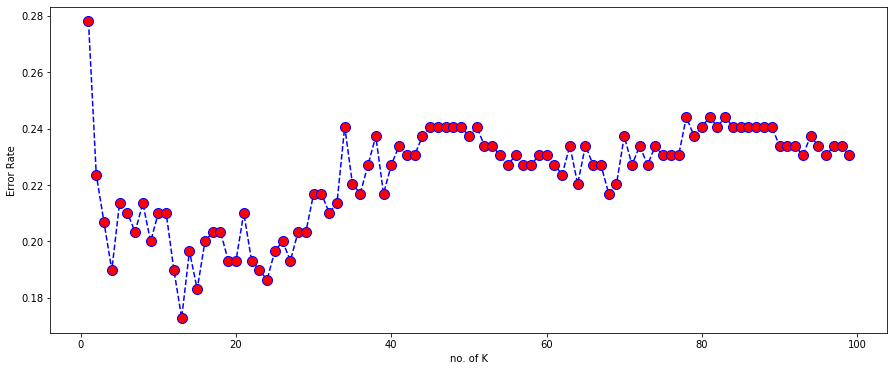

In [48]:
plt.figure(figsize=(15,6))
plt.plot(range(1,100),error_rate,color='blue',linestyle='dashed',marker='o', markerfacecolor='red', markersize='10')
plt.xlabel('no. of K')
plt.ylabel('Error Rate')

# Cross validation

In [49]:
from sklearn.model_selection import cross_val_score

In [50]:
neighbors = [x for x in range(1,100)]
# empty list that will hold cv scores
cv_scores = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=8, scoring='accuracy')
    cv_scores.append(scores.mean())


In [51]:
MSE = [1-x for x in cv_scores]

optimal_k_index = MSE.index(min(MSE))
optimal_k = neighbors[optimal_k_index]
print("Optimal value of k is",optimal_k)


Optimal value of k is 26


`Interpretation`: We saw that the optimal value of K after cross validation is 26, and the earlier graph blotted for error_rate vs k also showed a similar value of k for minimum error rate

### Plot misclassification error vs k

`How?` As We had stored the MSE values, we plot them for different values of K.

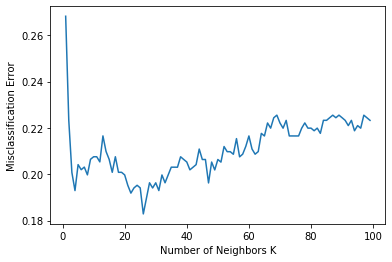

In [52]:
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

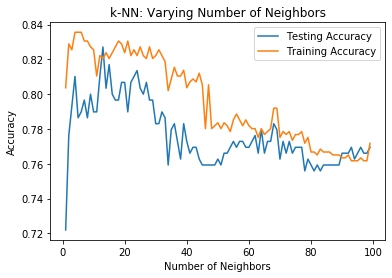

In [53]:

plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test, label = 'Testing Accuracy')
plt.plot(neighbors, train, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [54]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [55]:
knn = KNeighborsClassifier(n_neighbors=26)
knn.fit(X_train,Y_train)
pred = knn.predict(X_test)
accuracy = accuracy_score(Y_test,pred,normalize=True) * float(100)
print(confusion_matrix(Y_test, pred))

[[167  17]
 [ 42  69]]


In [56]:
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       184
           1       0.80      0.62      0.70       111

    accuracy                           0.80       295
   macro avg       0.80      0.76      0.78       295
weighted avg       0.80      0.80      0.79       295



In [57]:
accuracy

80.0

## For test data## 

In [58]:
import pandas as pd

In [59]:
df = pd.read_csv("test.csv")

In [60]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [61]:
df_test = df

In [62]:
df_test['Family'] = df_test['SibSp'] + df_test['Parch'] + 1

In [63]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,3


### Dropping unnecessary columns

In [64]:
df_test = df_test.drop(['SibSp','Parch','Cabin','Fare','Ticket','PassengerId','Name'], axis=1)


In [65]:
df_test.head()

,Pclass,Sex,Age,Embarked,Family
0,3,male,34.5,Q,1
1,3,female,47.0,S,2
2,2,male,62.0,Q,1
3,3,male,27.0,S,1
4,3,female,22.0,S,3


### Converting string to int

In [66]:
df_test['Embarked'].unique()

array(['Q', 'S', 'C'], dtype=object)

In [67]:
df_test['Embarked'][df_test['Embarked'] == "S"] = 1
df_test['Embarked'][df_test['Embarked'] == "C"] = 2
df_test['Embarked'][df_test['Embarked'] == "Q"] = 3

In [68]:
df_test['Embarked'].unique()

array([3, 1, 2], dtype=object)

In [69]:
df_test['Sex'][df_test['Sex'] == 'male'] = 1
df_test['Sex'][df_test['Sex'] == 'female'] = 2

In [70]:
df_test.head()

,Pclass,Sex,Age,Embarked,Family
0,3,1,34.5,3,1
1,3,2,47.0,1,2
2,2,1,62.0,3,1
3,3,1,27.0,1,1
4,3,2,22.0,1,3


In [71]:
df_test.isnull().sum()

Pclass       0
Sex          0
Age         86
Embarked     0
Family       0
dtype: int64

In [72]:
X=df_test.groupby(['Sex', 'Pclass']).median()['Age']

In [73]:
print(X)

Sex  Pclass
1    1         42.0
     2         28.0
     3         24.0
2    1         41.0
     2         24.0
     3         22.0
Name: Age, dtype: float64


In [74]:
df_test['Age'] = df_test.groupby(['Sex', 'Pclass'])['Age']\
    .transform(lambda x: x.fillna(x.median()))

In [75]:
df_test.isnull().sum()

Pclass      0
Sex         0
Age         0
Embarked    0
Family      0
dtype: int64

In [76]:
df_test['Age-group'] = 0
df_test['Age-group'][df_test['Age'] >= 12] = 1 
df_test['Age-group'][df_test['Age'] >= 26] = 2 
df_test['Age-group'][df_test['Age'] >= 40] = 3 
df_test['Age-group'][df_test['Age'] >= 60] = 4 
df_test['Age-group'][df_test['Age'] >= 75] = 5 


In [77]:
df_test['Age-group'].unique()

array([2, 3, 4, 1, 0, 5])

`Dropping Age now`

In [78]:
df_test= df_test.drop(['Age'], axis=1)

In [79]:
df_test.head()

,Pclass,Sex,Embarked,Family,Age-group
0,3,1,3,1,2
1,3,2,1,2,3
2,2,1,3,1,4
3,3,1,1,1,2
4,3,2,1,3,1


## Making final predictions using knn.predict, and we see how 'final' is an array of 0 and 1, representing whether the person survived or not

In [80]:
final = knn.predict(df_test)

final

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [81]:
len(final)

418

In [82]:
df['Survived'] = pd.Series(final,index = df.index)

In [83]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,3,0


In [84]:
df['Survived'].unique()

array([0, 1])

In [85]:
final_df = df.filter(['PassengerId','Survived'],axis=1)
final_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


### Creating fnal file with predictions

In [86]:
final_df.to_csv('predictions.csv',encoding = 'utf-8')